# ch04. 텍스트 분류
## 00. 텍스트 분류란?
- 텍스트 분류
  - 자연어 처리 기술을 활용해 글의 정보를 추출하여 문제에 맞게 사람이 정한 범주(Class)로 분류하는 문제


## 01. 영어 텍스트 분류

### 1) 실습 데이터
- 캐글 대회의 영화 리뷰 데이터
  - Bag of Words Meets Bags of Popcorn (워드팝콘)

|||
|---|---|
|데이터 이름|Bag of Words Meets Bags of Popcorn|
|데이터 용도|텍스트 분류 학습 목적|
|데이터 권한|MIT 권한을 가지나 캐글 가입 후 사용 권장|
|데이터 출처|https://www.kaggle.com/c/word2vec-nip-tutorial/data


### 2) 문제 소개
- **워드 팝콘**
  - 인터넷 영화 데이터베이스(IMDB)에서 나온 영화 평점 데이터를 활용한 캐글 문제
  - 영화 평점 데이터이므로 각 데이터는 영화 리뷰 텍스트와 평점에 따른 감정 값(긍정 or 부정)으로 구성
  - 보통 감정 분석(sentiment analysis) 문제에서 자주 활용
  
  
- 목표
  1. 데이터를 로드 및 전처리
  2. 데이터 분석
  3. 알고리즘 모델링


### 3) 데이터 분석 및 전처리
- EDA 과정으로 데이터 전처리 전 데이터를 자세히 탐색해보기

#### ① Unzip Word Popcorn data

In [1]:
import zipfile

In [2]:
# 경로를 명명해주면 편하게 사용할 수 있음
DATA_IN_PATH = './data/word2vec-nlp-tutorial/'

In [3]:
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

#### ② import library & data set

In [4]:
import numpy as np 
import pandas as pd
import os # Operating System 제어(e.g 파일이나 폴더 만들기, 복사하기 등)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header=0, delimiter='\t', quoting=3)

In [6]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


- 데이터 구성
  - i, sentiment(긍정 1, 부정 0), review


#### ③ 데이터 분석 순서
1. 데이터 크기  
2. 데이터 개수  
3. 각 리뷰 문자 길이 분포  
4. 많이 사용된 단어  
5. 긍정, 부정 데이터 분포
6. 각 리뷰 단어 개수 분포  
7. 짝수문자 및 대문자, 소문자 비율  

In [7]:
## 1. 데이터 크기
print("파일 크기: ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

## 2. 데이터 개수
print('전체 학습데이터 개수: {}'.format(len(train_data)))

파일 크기: 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB
전체 학습데이터 개수: 25000


Text(0, 0.5, 'Number of review')

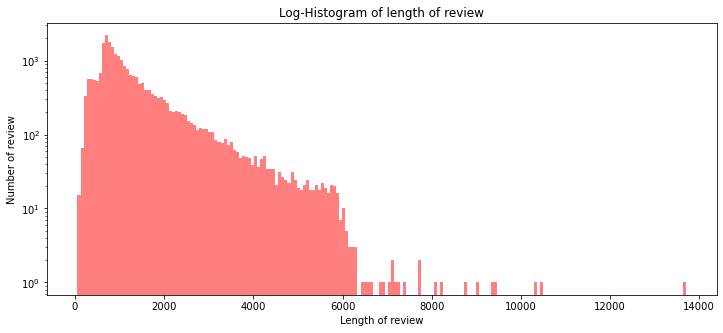

In [8]:
## 3. 각 리뷰 문자 길이 분포
train_length = train_data['review'].apply(len)
train_length.head()

## 위 변수에 각 리뷰의 길이가 담겨 있음
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [9]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1b902e50610>,
 'caps': [<matplotlib.lines.Line2D at 0x1b902e50cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b902e502b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b902e583d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b902e58a30>],
 'means': [<matplotlib.lines.Line2D at 0x1b902e586d0>]}

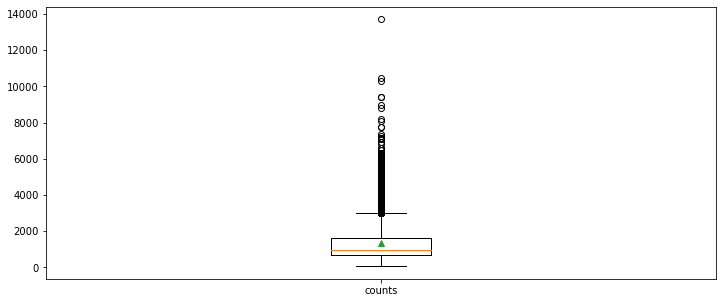

In [10]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

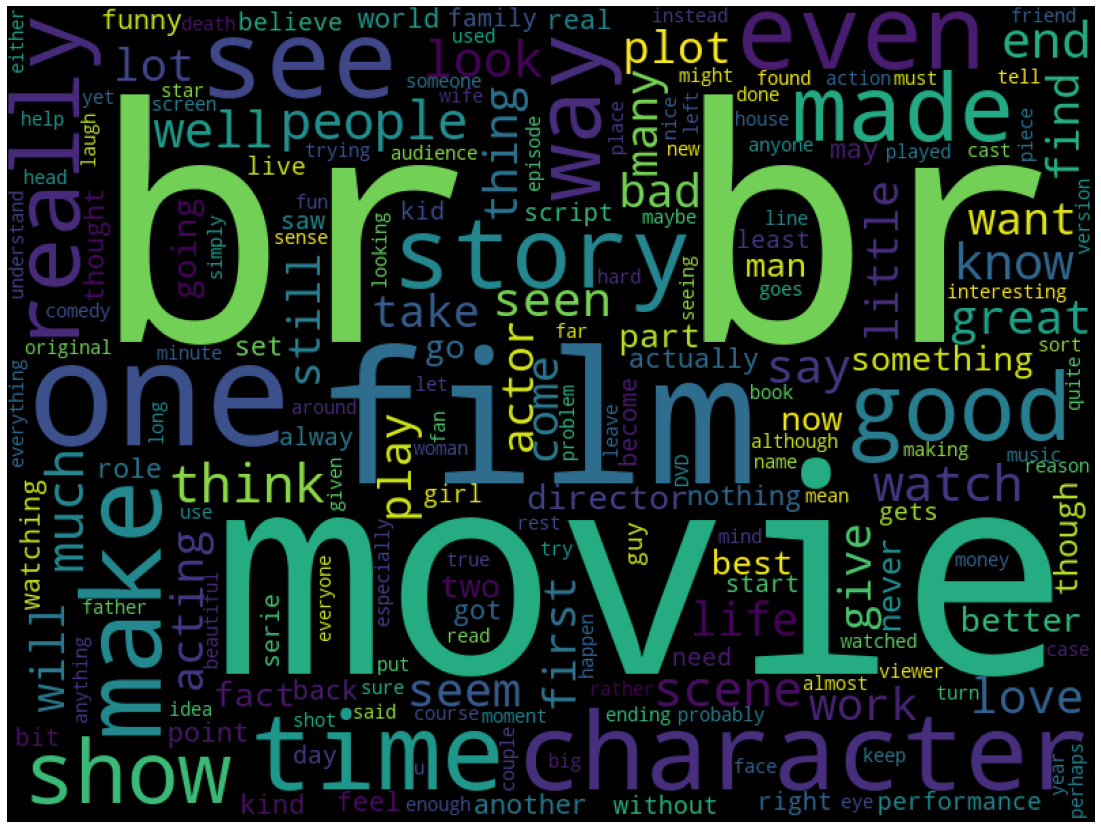

In [11]:
## 4. 많이 사용된 단어
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

- 워드클라우드 결과 해석
  - 데이터에서 가장 많이 사용된 단어: br
    - br은 HTML 태그로 해당 데이터셋이 정제되지 않은 인터넷상 리뷰 형태임을 파악할 수 있음

긍정 리뷰 수: 12500
부정 리뷰 수: 12500


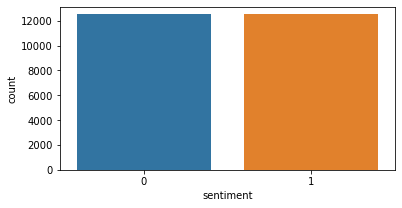

In [12]:
## 5. 긍정, 부정 데이터 분포
fig,axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])

print("긍정 리뷰 수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 수: {}".format(train_data['sentiment'].value_counts()[0]))

Text(0, 0.5, 'Number of reviews')

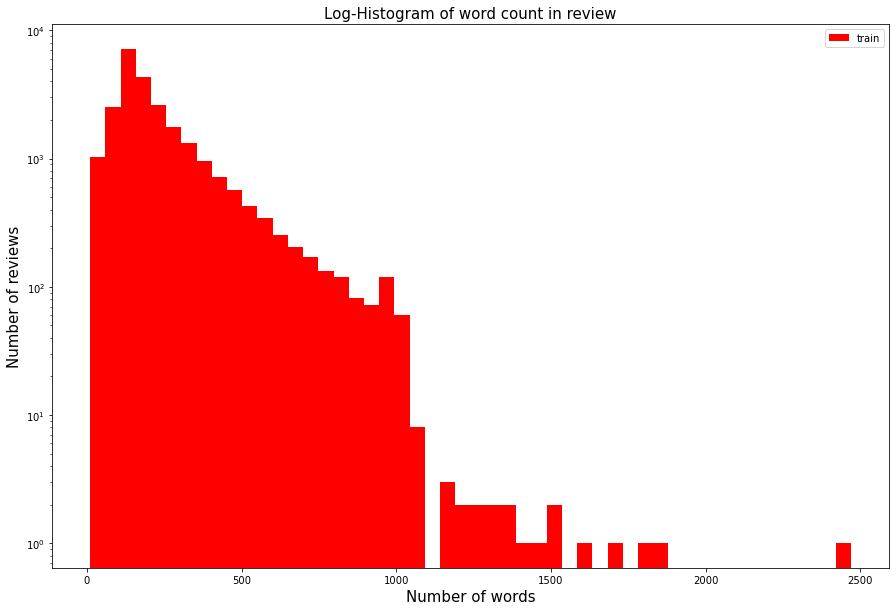

In [13]:
## 6. 각 리뷰 단어 개수 분포
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [14]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 2470
리뷰 단어 개수 최솟값: 10
리뷰 단어 개수 평균값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간값: 174.0
리뷰 단어 개수 제1사분위: 127.0
리뷰 단어 개수 제3사분위: 284.0


In [15]:
## 7. 특수문자 및 대문자, 소문자 비율
# 물음표가 구두점 역할을 함
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) 
# 마침표
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) 
#  첫번째 대문자
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) 
# 대문자 개수
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) 
# 숫자 개수
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


#### ④ 데이터 전처리

- 사용 라이브러리
  - pandas: 데이터 다루기 위한 라이브러리
  - numpy: 전처리된 데이터 저장 위한 라이브러리
  - re: 정규표현식을 불러오는 라이브러리
  - Beautiful Soup: HTML과 XML 파일로부터 데이터를 가져오기 위한 라이브러리
  - stopwords: 불용어 제거 함수
  - pad_sequences: 텐서플로 전처리 모듈
  - Tokenizer: 텐서플로 전처리 모듈

In [16]:
import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [17]:
# train_data 리뷰 출력
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

- 확인
  - HTML 태그와 특수문자 포함  
    → Beautiful Soup 이용하여 HTML 태그 제거  
    → re.sub 함수로 특수문자 제거

In [18]:
review = train_data['review'][0]

# HTML 태그 제거
review_text = BeautifulSoup(review,"html5lib").get_text() 

# 영어 문자를 제외하고 모두 공백 변환
review_text = re.sub("[^a-zA-Z]", " ", review_text) 

print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

- 확인
  - HTML 태그와 특수문자가 모두 제거된 것 확인

- 다음 단계
  - 불용어(stopword) 삭제
  - 불용어란 문장에서 자주 출현하나 전체 의미에 큰 영향을 주지 않는 단어
  - 사용자 정의 가능하나, NLTK 불용어 사전 이용 가능
  - NLTK 불용어 사전은 소문자로만 구성  
    → 문서를 소문자로 변환한 후 불용어 제거 작업을 해야 함

In [19]:
## 영어 불용어 set 
stop_words = set(stopwords.words('english'))

review_text = review_text.lower()
# 단어 기준으로 나누어 단어 리스트 만들기
words = review_text.split()
print(words)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

In [20]:
# 불용어 제거 리스트
words = [w for w in words if not w in stop_words]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [21]:
## 단어 리스트를 다시 하나의 글로 합치기
clean_review = ' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

- 편의를 위해 모든 전처리 과정을 함수로 정의하기

In [22]:
def preprocessing( review, remove_stopwords = False ): 
    # 불용어 제거는 옵션으로 선택 가능하다.
    
    # 1. HTML 태그 제거
    review_text = BeautifulSoup(review, "html5lib").get_text()	

    # 2. 영어가 아닌 특수문자들을 공백(" ")으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    # 3. 대문자들을 소문자로 바꾸고 공백단위로 텍스트들 나눠서 리스트로 만든다.
    words = review_text.lower().split()

    if remove_stopwords: 
        # 4. 불용어들을 제거
    
        #영어에 관련된 불용어 불러오기
        stops = set(stopwords.words("english"))
        # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.	
        clean_review = ' '.join(words)

    else: # 불용어 제거하지 않을 때
        clean_review = ' '.join(words)

    return clean_review

In [23]:
## 전체 데이터 전처리 진행
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))

## 전처리한 데이터 중 하나 출력
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [24]:
## 지금까지 전처리한 단어를 판다스의 데이터프레임으로 만들어두기
## 이유? 모델에 따라 벡터가 아닌 텍스트로만 구성된 값을 사용해야 할 수도 있음
clean_train_df = pd.DataFrame({
    'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

- 남은 과정
  1. 전처리한 데이터에서 각 단어를 인덱스로 벡터화하기
  2. 모델에 따라 입력값 길이가 동일해야 하므로 패딩 과정 진행하기

In [25]:
## Tokenizer 모듈 생성 후, 인덱스로 구성된 벡터로 변환
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

- 확인
  - 텍스트로 된 첫 번째 리뷰가 각 단어의 인덱스로 바뀜

- 다음 작업
  - 각 인덱스가 어떤 단어를 의미하는지 확인 필요
    → 단어사전으로 확인 가능

In [26]:
## 단어 사전
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
print(word_vocab)

## 전체 데이터에 사용된 단어 개수 확인
print("\n전체 단어 수: ", len(word_vocab))

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

- 이후 모델에서 사용하기 위해 단어 사전, 전체 단어 개수 저장

In [27]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

- 패딩 작업
  - 각 데이터 길이가 동일해야 모델에 바로 적용할 수 있음
    → 특정 길이를 최대 길이로 정함
    → 긴 데이터는 뒷부분 자름, 짧은 데이터는 0값으로 패딩

In [28]:
MAX_SEQUENCE_LENGTH = 174 # 최대 길이 지정 시, 보통 중간값을 이용

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


- 학습 시 라벨(정답)을 나타내는 값을 넘파이 배열로 저장
  - 이유? 이후에 전처리한 데이터 저장 시 넘파이 형태로 저장하기 때문에

In [29]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


- 확인
  - 데이터 형태: 데이터 25,000개, 라벨 형태: 길이 25,000  
    → 데이터 하나당 하나의 값을 가지는 형태

#### ⑤ 데이터 저장하기
- 텍스트 데이터: CSV 파일
- 벡터화한 데이터, 정답 라벨: 넘파이 파일
- 데이터 정보(딕셔너리 형태): JSON 파일로 저장

In [30]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

In [31]:
# 전처리한 데이터→ 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트→ csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)

# 데이터 사전→ json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

- 평가 데이터 저장
  - 라벨 값이 없기 때문에 라벨 저장 필요 없음
  - 단어 사전과 단어 개수 정보도 학습 데이터 것을 사용하므로 저장 필요 없음
  - **각 리뷰 데이터에 리뷰에 대한 'id'값 지정 필요**
  - 나머지는 학습 데이터와 동일하게 전처리 진행

- 확인 사항
  - 평가 데이터 전처리 시, 토크나이저를 통해 인덱스 벡터로 만들 때, 기존 학습 데이터에 적용한 토크나이저 객체를 사용해야 함
  - 새롭게 만드는 경우, 학습 데이터와 평가 데이터에 대한 각 단어 인덱스가 달라져서 모델에

In [32]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))


clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [33]:
## 평가 데이터 저장
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

### 4) 모델링 소개
- 전처리된 데이터를 모델에 적용하고, 주어진 텍스트의 감정이 긍정인지 부정인지 예측하는 모델 생성
  - 머신러닝 모델: 선형회귀모델, 랜덤포레스트모델 / 사이킷런 사용
  - 딥러닝 모델: 합성곱 신경망(CNN) 모델, 순환 신경망(RNN) 모델 / 텐서플로 사용
  
#### ① 회귀 모델
- 로지스틱 회귀 모델은 주로 이항 분류에 사용
- 선형 결합을 통해 나온 결과를 토대로 예측  


- **선형회귀모델**
  - 종속변수와 독립변수 간 상관관계를 모델링하는 방법
  - y = $w_{1}x_{1} + w_{2}x_{2} + ... + b$
    - w, b: 학습하고자 하는 파라미터
    - x: 입력값 (단어, 문장 표현 벡터)  


- **로지스틱 회귀 모델**
  - 선형 모델의 결괏값에 로지스틱 함수를 적용해 0-1 사이 값을 갖게 하여 확률로 표현
  - 결과가 1에 가까우면 정답이 1이라고 예측하고 0에 가까우면 0으로 예측함
  - 로지스틱 모델로 하는 텍스트 분류: 입력값인 단어를 단어 임베딩 벡터로 만들기
    - word2vec, tf-idf 등

#### ② 회귀모델 1: TF-IDF를 활용한 모델 구현
- 사이킷런의 TfidVectorizer 사용 (입력값이 텍스트로 이뤄진 데이터 형태여야 함)

In [34]:
## 라이브러리 불러오기
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [35]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

- TF-IDF 벡터화
  - min_df: 특정 토큰 df 값이 설정한 값보다 적게 나오면 벡터화 과정에서 제거
  - analyzer: 분석하기 위한 기준 단위
    - word: 단어 하나 단위
    - char: 문자 하나 단위
  - sublinear_tf: 문서 단어 빈도 수(term frequency)에 대한 스무딩(smoothing) 여부를 설정하는 값
  - ngram_range: 빈도 기본 단위를 어느 범위의 n-gram으로 설정할 것인지 보는 인자
  - max_features: 각 벡터의 최대 길이, 특징의 길이를 설정

In [36]:
## TfidVectorizer 생성 후, fit transform 함수로 전체 문장에 대한 특징 벡터 데이터 X 생성
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3), max_features=5000) 

X = vectorizer.fit_transform(reviews)

- 학습 / 검증 데이터셋 분리

In [37]:
RANDOM_SEED = 42
TEST_SPLIT = 0.2 #학습 데이터의 20%

y = np.array(sentiments) #정답 라벨을 넘파이 배열로 만듦

X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

- 모델 선언 및 학습
  - LogisticRegression 클래스 객체 생성
  - 객체 생성 후, fit 함수 호출하면 데이터에 대한 모델 학습이 진행됨

In [38]:
lgs = LogisticRegression(class_weight='balanced') 
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

- 검증 데이터로 성능 평가 (교재에서는 정확도만 측정)
  - 학습한 객체의 score 함수 이용

In [39]:
## 검증 데이터로 성능 측정
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

Accuracy: 0.869600


- 데이터 저장

In [40]:
## 전처리한 텍스트 형태의 평가 데이터 불러오기
TEST_CLEAN_DATA = 'test_clean.csv'
test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

In [41]:
## 학습 데이터에 사용한 객체를 사용해 TF-IDF 값으로 벡터화
## 벡터화할 때, 평가 데이터에 대해서는 fit을 호출하지 않고 그대로 transform만 호출"
testDataVecs = vectorizer.transform(test_data['review'])

In [42]:
## 예측값을 하나의 변수로 할당하고 출력하여 형태 확인하기
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 0]


In [43]:
DATA_OUT_PATH = './output/word2vec-nlp-tutorial/'

answer_dataset = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False, quoting=3)

#### ③ 회귀모델 2: word2vec을 활용한 모델 구현
- 각 단어를 word2vec으로 벡터화하기
- word2vec은 단어로 표현된 리스트를 입력값으로 넣어야 함

In [44]:
## 데이터 불러오고 각 단어릐 리스트로 나누기
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

## split 함수를 이용해 띄어쓰기 기준으로 리뷰 구분 후 리스트에 추가하여 입력값 생성
sentences = []
for review in reviews:
    sentences.append(review.split())

- word2vec 벡터화
  - word2vec 모델이 하이퍼파라미터 설정
    - num_features: 각 단어에 대해 임베딩된 벡터 차원 결정
    - min_word_count: 적은 빈도 수의 단어 학습하지 않게 함
    - num_workers: 학습을 위한 프로세스 개수 지정
    - context: word2vec 수행 위한 컨텍스트 윈도 크기 지정
    - downsampling: 빠른 학습을 위해 정답 단어 라벨의 다운 샘플링 비율 지정(보통 0.001)

In [45]:
num_features = 300    
min_word_count = 40   
num_workers = 4       
context = 10          
downsampling = 1e-3 # =0.001

- word2vec 학습 진행 상황 확인하는 방법
  - 아래와 같이 값을 맞추고 로그 메시지를 INFO로 맞추면 학습 과정에서 INFO 수준으로 보여줌

In [46]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
   level=logging.INFO)

- word2vec 학습 시작
  - word2vec 객체를 생성하여 실행
  - 학습 후 생성된 객체는 model 변수에 할당됨
  - 학습을 위한 객체 인자에는 입력 데이터와 하이퍼파라미터를 순서대로 입력해야 원하는 하이퍼파라미터로 학습할 수 있음

In [47]:
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences,
                          workers=num_workers,
                          size=num_features, 
                          min_count = min_word_count,
                          window = context, 
                          sample = downsampling)

2020-12-22 23:27:47,567 : INFO : collecting all words and their counts
2020-12-22 23:27:47,570 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-12-22 23:27:49,464 : INFO : PROGRESS: at sentence #10000, processed 2354780 words, keeping 163178 word types
2020-12-22 23:27:51,376 : INFO : PROGRESS: at sentence #20000, processed 4686268 words, keeping 251892 word types
2020-12-22 23:27:52,334 : INFO : collected 289705 word types from a corpus of 5844706 raw words and 25000 sentences
2020-12-22 23:27:52,336 : INFO : Loading a fresh vocabulary
2020-12-22 23:27:52,803 : INFO : effective_min_count=40 retains 9563 unique words (3% of original 289705, drops 280142)
2020-12-22 23:27:52,805 : INFO : effective_min_count=40 leaves 5008901 word corpus (85% of original 5844706, drops 835805)
2020-12-22 23:27:52,928 : INFO : deleting the raw counts dictionary of 289705 items
2020-12-22 23:27:52,953 : INFO : sample=0.001 downsamples 45 most-common words
2020-12-22 23:27:52,

2020-12-22 23:28:44,589 : INFO : EPOCH 5 - PROGRESS: at 59.79% examples, 366505 words/s, in_qsize 8, out_qsize 1
2020-12-22 23:28:45,592 : INFO : EPOCH 5 - PROGRESS: at 71.76% examples, 377419 words/s, in_qsize 8, out_qsize 0
2020-12-22 23:28:46,613 : INFO : EPOCH 5 - PROGRESS: at 83.96% examples, 385179 words/s, in_qsize 7, out_qsize 0
2020-12-22 23:28:47,664 : INFO : EPOCH 5 - PROGRESS: at 96.07% examples, 389401 words/s, in_qsize 8, out_qsize 0
2020-12-22 23:28:47,998 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-12-22 23:28:48,013 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-12-22 23:28:48,026 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-12-22 23:28:48,043 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-12-22 23:28:48,046 : INFO : EPOCH - 5 : training on 5844706 raw words (3711493 effective words) took 9.6s, 388383 effective words/s
2020-12-22 23:28:48,049 : INFO : training on a 

In [48]:
## word2vec으로 학습한 모델 저장하기
## 모델을 저장하면 Word2Vec.load()를 통해 다시 사용할 수 있음
DATA_IN_MODEL = './model/'
model_name = DATA_IN_MODEL + "300features_40minwords_10context"
model.save(model_name)

2020-12-22 23:28:48,066 : INFO : saving Word2Vec object under ./model/300features_40minwords_10context, separately None
2020-12-22 23:28:48,071 : INFO : not storing attribute vectors_norm
2020-12-22 23:28:48,075 : INFO : not storing attribute cum_table
2020-12-22 23:28:48,607 : INFO : saved ./model/300features_40minwords_10context


- word2vec 모델로 선형회귀모델 학습하기
  - 학습을 위해 하나의 리뷰를 같은 형태의 입력값으로 만들어야 함
  - 현재 상황
    - word2vec 모델에서 각 단어는 벡터로 표현되어 있음
    - 리뷰마다 단어의 개수가 달라 입력값을 하나의 형태로 만들어야 함
    - 가장 단순한 방법: 문장 모든 단어 벡터값을 평균 내어, 리뷰 하나당 하나의 벡터로 만드는 방법
  
  
- 사용 인자
  - words: 단어 모음인 하나의 리뷰가 들어감
  - model: word2vec 모델을 넣는 곳, 학습한 word2vec 모델이 들어감
  - num_features: word2vec으로 임베딩할 때 정한 벡터의 차원 수

In [49]:
def get_features(words, model, num_features):
    # 출력 벡터 초기화
    feature_vector = np.zeros((num_features),dtype=np.float32)
    # 속도를 빠르게 하기 위해 미리 0 값을 가지는 벡터를 만듦

    num_words = 0
    # 어휘사전 준비
    index2word_set = set(model.wv.index2word)

    for w in words:
        if w in index2word_set:
            num_words += 1
            # 사전에 해당하는 단어에 단어 벡터를 더함
            feature_vector = np.add(feature_vector, model[w])
    
    # 문장 단어 수만큼 나누어 단어 벡터의 평균값을 문장 벡터로 함
    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

- 각 리뷰의 평균 벡터를 구하는 함수 정의
  - reviews: 학습 데이터인 전체 리뷰 데이터를 입력하는 인자
  - model: word2vec 모델을 입력하는 인자, 앞에서 학습한 모델을 넣음
  - num_features:word2vec으로 임베딩할 때 정한 벡터의 차원 수

In [50]:
def get_dataset(reviews, model, num_features):
    dataset = list()

    for s in reviews:
        dataset.append(get_features(s, model, num_features))

    reviewFeatureVecs = np.stack(dataset)
    
    return reviewFeatureVecs

In [51]:
## 전체 리뷰 데이터로 실제 학습에 사용될 입력값 만들기
test_data_vecs = get_dataset(sentences, model, num_features)

<ipython-input-49-106d7cfa9b06>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vector = np.add(feature_vector, model[w])


- 학습 / 검증 데이터셋 분리

In [52]:
X = test_data_vecs
y = np.array(sentiments)

RANDOM_SEED = 42
TEST_SPLIT = 0.2 #학습 데이터의 20%

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

- 모델 선언 및 학습
  - TF-IDF 벡터와 동일하게 로지스틱 모델을 사용
  - 입력값을 뽑은 특징만 다르고 이외는 모두 동일
  - 모델 생성 시, class_weight 인자값을 balanced로 설정하여 각 레벨에 대해 균형 있는 학습 수행

In [53]:
lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

C:\Users\naeun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

- 검증 데이터셋을 이용한 성능 평가

In [54]:
print("Accuracy: %f" % lgs.score(X_test, y_test))

Accuracy: 0.832600


- 데이터 제출
  - 전처리한 평가 데이터를 불러온 후 리뷰 값을 리스트로 만들기

In [55]:
TEST_CLEAN_DATA = 'test_clean.csv'
test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)
test_review = list(test_data['review'])

print(test_data.head(5))

                                              review          id
0  naturally film main themes mortality nostalgia...  "12311_10"
1  movie disaster within disaster film full great...    "8348_2"
2  movie kids saw tonight child loved one point k...    "5828_4"
3  afraid dark left impression several different ...    "7186_2"
4  accurate depiction small time mob life filmed ...   "12128_7"


- 평가 데이터도 학습 데이터처럼 각 리뷰가 하나의 문자열로 이뤄져 있음  
  → 각 단어의 리스트로 만들어야 함

In [56]:
test_sentences = list()
for review in test_review:
    test_sentences.append(review.split())

- word2vec으로 임베딩된 벡터값을 할당해야 함
  - 단, 평가 데이터에 대해 새롭게 word2vec 모델을 학습시키지 않고 이전에 학습한 모델을 사용해 각 단어를 벡터로 만들어 각 리뷰에 대한 특징값을 만들어야 함

In [57]:
test_data_vecs = get_dataset(test_sentences, model, num_features)

<ipython-input-49-106d7cfa9b06>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vector = np.add(feature_vector, model[w])


- 데이터 저장

In [58]:
DATA_OUT_PATH = './output/word2vec-nlp-tutorial'

test_predicted = lgs.predict(test_data_vecs)

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id': ids, 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_w2v_answer.csv', index=False, quoting=3)

#### ④ 랜덤 포레스트 분류 모델
- 랜덤 포레스트 모델
  - 여러 개의 의사결정 트리의 결괏값을 평균낸 것을 결과로 사용
  - 랜덤 포레스트를 통해 분류 혹은 회귀를 수행할 수 있음
  

- CountVectorizer를 활용한 벡터화
  - 모델 구현에 앞서 모델에 사용할 입력값을 정해야 함
  - 랜덤 포레스트 모델에서는 CountVectorizer를 사용해 모델의 입력값을 만듦

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

## 분석 단위를 단어로 지정, 각 벡터 최대 길이를 5000으로 설정
vectorizer = CountVectorizer(analyzer = "word", max_features = 5000) 
train_data_features = vectorizer.fit_transform(reviews)

train_data_features

<25000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2956247 stored elements in Compressed Sparse Row format>

- 학습 / 검증 데이터 분리

In [60]:
TEST_SIZE = 0.2
RANDOM_SEED = 42

train_input, eval_input, train_label, eval_label = train_test_split(
    train_data_features, y,test_size=TEST_SIZE, random_state=RANDOM_SEED)

- 모델 구현 및 학습
  - 랜덤 포레스트는 사이킷런 라이브러리의 RandomForestClassifier 객체로 구현

In [61]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기에 의사결정트리 100개 사용
forest = RandomForestClassifier(n_estimators = 100) 

# 단어 묶음을 벡터화한 데이터와 정답 데이터로 학습 시작
forest.fit(train_input, train_label)

RandomForestClassifier()

- 검증 데이터셋으로 성능 평가

In [62]:
print("Accuracy: %f" % forest.score(eval_input, eval_label))

Accuracy: 0.843800


- 데이터 제출
  - 전처리한 평가 데이터 불러오기

In [63]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

test_reviews = list(test_data['review'])
ids = list(test_data['id'])

In [64]:
# 평가 데이터 백터화
test_data_features = vectorizer.transform(test_reviews)

In [65]:
# 위에서 만든 랜덤 포레스트 분류기를 통해 예측값을 가져오기
result = forest.predict(test_data_features)

# 판다스 데이터 프레임을 통해 데이터를 구성해서 output에 넣기
output = pd.DataFrame( data={"id": ids, "sentiment": result} )

# csv파일로 만들기
output.to_csv( DATA_OUT_PATH + "Bag_of_Words_model.csv", index=False, quoting=3 )

#### ⑤ 순환 신경망 분류 모델
- 딥러닝을 활용해 분류하는 모델 살펴보기
- 순환 신경망(RNN; Recurrent Neural Network)
  - 이전 정보(은닉 상태, hidden state)가 점층적으로 쌓이며 현재 정보(입력 상태, input state)를 표현할 수 있는 모델
  - 시간에 의존적이거나 순차적인 데이터에 관한 문제에 활용
  - 한 단어에 관한 정보를 입력하면 그 다음 나올 단어를 예측

In [66]:
# 모듈 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from tqdm import tqdm

# 시각화 함수
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

- 실습 내용
  - 영화 평점 예측
    - 입력 문장을 순차적으로 입력만 하고 마지막으로 입력한 시점에 출력 정보를 뽑아 영화 평점 예측
    - 매 시간 스탭에 따라 입력되는 정보는 은닉 상태를 통해 정보를 다음 시간 스탭으로 전달하게 함
    - 마지막 시간 스탭에 나온 은닉 상태는 문장 전체 정보가 담긴 정보로, 이 정보를 활용해 영화 평점을 예측할 수 있도록 로지스틱 회귀 또는 이진 분류를 함
    

- 랜덤 시드 고정
  - 모델과 샘플링을 하는 모든 랜덤 변수 상태를 고정하기 위함

In [68]:
# 학습 데이터 경로 정의
DATA_IN_PATH = './data/word2vec-nlp-tutorial/'
DATA_OUT_PATH = './output/word2vec-nlp-tutorial/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

# 랜덤 시드 고정
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

# 파일 로드
# 입력 텍스트와 데이터 라벨이 numpy.Array 형식으로 저장되어 np.load로 불러올 수 있음
# 입력 텍스트 데이터는 train_input, 데이터 라벨은 train_lael에 할당됨

# train_input 데이터에 대해서는 모델 학습 시 텍스트 길이를 맞추기 위해 pad_sequences 함수 사용
train_input = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_label = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))

# 데이터 사전정보 불러오기 (이전에 데이터 전처리 후 json 파일에 저장)
# 모델에 있는 단어 임베딩 크기 정의 시 활용
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

- 모델 하이퍼파라미터 정의
  - 모델 학습을 위한 설정: 배치 크기나 에폭 수, 텍스트 데이터 길이, validation 데이터셋 구성 비율 등은 상수로 정의
  - 모델 레이어의 차원 수 설정: 모델의 __init__ 함수 파라미터에 입력하기 위해 dict 객체에서 정의, 레이어 차원 수나 드롭아웃 값을 정하는 하이퍼파라미터 명칭은 key에, key에 해당하는 하이퍼파라미터 명칭에 대한 값은 value에 입력

In [69]:
model_name = 'rnn_classifier_en'
BATCH_SIZE = 128
NUM_EPOCHS = 5
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_dimension': 100,
        'dropout_rate': 0.2,
        'lstm_dimension': 150,
        'dense_dimension': 150,
        'output_dimension':1}

- 모델 구현
  - tensorflow.keras 기반으로 구현하고 클래스로 모델을 정의해서 구현

In [71]:
# 클래스로 모델을 구현하기 위해서는 tf.keras.model 상속 필요
class RNNClassifier(tf.keras.Model):

    # 가장 먼저 구현할 함수는 __init__: RNNClassifier 모델 객체 생성 시마다 실행
    # 매개변수로 모델 레이어의 입력 및 출력 차원 수를 정의하는 하이퍼파라미터 정보를 dict 객체로 받음
    def __init__(self, **kargs):
        
        # tf.keras.Model 클래스를 상속받는 경우, super 함수를 통해 부모 클래스에 있는 __init__ 함수 호출
        # super 함수로 부모 클래스에 __init__ 함수 인자 모델 이름을 전달하면
        # tf.keras.Model을 상속받은 모든 자식은 해당 모델 이름을 공통으로 사용
        super(RNNClassifier, self).__init__(name=kargs['model_name'])
        
        # 텍스트 임베딩 벡터를 위해 layers.Embedding 객체 생성
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_dimension'])
        
        # RNNClassifier 클래스에서는 RNN 계열 모델인 LSTM을 2개 레이어로 활용
          # return_sequences: 레이어 출력 차원 수와 출력 시퀀스를 전부 출력할지 여부 판단
          # Ture: 시퀀스 형태의 은닉 상태 벡터 출력
        # 첫 레이어에서 시퀀스 은닉 상태 벡터를 출력해서 다음 레이어에 입력할 시퀀스 벡터를 구성하고
        # 마지막 레이어에서는 시퀀스의 마지막 스탭 은닉 상태 벡터 출력이 필요
        # → 첫 번째 레이어에만 True 지정
        self.lstm_1_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'], return_sequences=True)
        self.lstm_2_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'])
        
        # 모델 과적합 방지를 위한 레이어 선언
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        
        # RNN 레이어에서 출력한 상태 벡터를 피드 포워드 네트워크를 거치게 함
        # 객체 생성 시, 입력 파라미터로 네트워크 출력 시 나오는 벡터 차원 수 units, 네트워크에서 사용할 활성화 함수 지정
        # 피드 포워드 네터워크에서는 tanh 함수를 사용하고 tf.keras.activations.tanh 함수를 activation 파라미터에 입력
        self.fc1 = layers.Dense(units=kargs['dense_dimension'],
                           activation=tf.keras.activations.tanh)
        
        # 회귀(regression) → Dense 레이어를 통해 예측한 값을 0~1의 값으로 표현할 수 있음
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid)
    
    # call 함수로 __init__을 통해 생성한 레이어 실행 가능
    # 입력한 워드 인덱스 시퀀스를 가지고 생성한 네트워트 모듈을 거쳐 마지막에 예측값을 출력
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = self.lstm_1_layer(x)
        x = self.lstm_2_layer(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

- 모델 생성

In [72]:
model = RNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

- 모델 학습

In [73]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=1)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

./output/word2vec-nlp-tutorial/rnn_classifier_en -- Folder already exists 



- 모델 성능 향상을 위해 활용하는 클래스
  - tensorflow.keras.callback 모듈의 EarlyStopping과 ModelCheckpoint 클래스 활용
  - ModelCheckpoint: 에폭마다 모델을 저장하게 함
    - save_best_only: 가장 성능 좋은 모델만 저장
    - save_weights_only: 모델 가중치만 저장 (모델 그래프 전부 저장하지 않음)

In [74]:
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

In [75]:
# 25분 가량 소요
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/5
176/176 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5053
Epoch 00001: val_accuracy improved from -inf to 0.50960, saving model to ./output/word2vec-nlp-tutorial/rnn_classifier_en\weights.h5
176/176 [==============================] - 412s 2s/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6929 - val_accuracy: 0.5096
Epoch 2/5
176/176 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.5345
Epoch 00002: val_accuracy improved from 0.50960 to 0.75760, saving model to ./output/word2vec-nlp-tutorial/rnn_classifier_en\weights.h5
176/176 [==============================] - 465s 3s/step - loss: 0.6805 - accuracy: 0.5345 - val_loss: 0.4860 - val_accuracy: 0.7576
Epoch 3/5
176/176 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8566
Epoch 00003: val_accuracy improved from 0.75760 to 0.88440, saving model to ./output/word2vec-nlp-tutorial/rnn_classifier_en\weights.h5
176/176 [==============================] - 469

- 성능 그래프 그리기

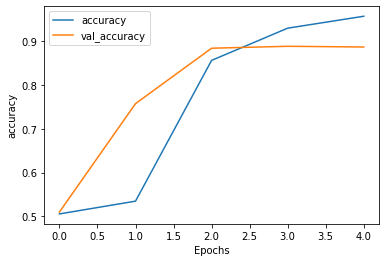

In [76]:
plot_graphs(history, 'accuracy')

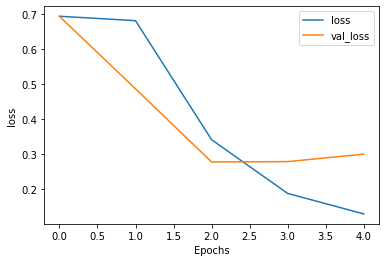

In [77]:
plot_graphs(history, 'loss')

- 데이터 제출

In [81]:
DATA_OUT_PATH = './output/word2vec-nlp-tutorial/'
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'

test_input = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])

# 베스트 모델 불러오기
SAVE_FILE_NM = 'weights.h5'
model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

# 테스트 데이터 예측하기
predictions = model.predict(test_input, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'), allow_pickle=True)

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame(data={"id": list(test_id), "sentiment":list(predictions)})
output.to_csv(DATA_OUT_PATH + 'movie_review_result_rnn.csv', index=False, quoting=3)

#### ⑥ 컨볼루션 신경망 분류 모델
- 합성곱 신경망(CNN; Convolutional neural network)
  - 전통적인 신경망 앞에 여러 계층의 합성곱(convolution) 계층을 쌓은 모델
  - 입력받은 이미지에 대한 가장 좋은 특징을 만들도록 학습하고, 추출된 특징으로 이미지를 분류하는 방식
  

- RNN이 단어 입력 순서를 중요하게 반영한다면, CNN은 문장 지역 정보를 보존하며, 각 문장 성분 등장 정보를 학습에 반영하는 구조
  - 기존의 n-gram 방식과 유사


- 모델 구현
  - 기본 코드는 RNN 구조와 동일하며, 모델 쪽 코드만 변경하면 CNN 적용 가능

In [82]:
model_name = 'cnn_classifier_en'
BATCH_SIZE = 512
NUM_EPOCHS = 2
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

- 모델 구현
  - 텐서플로의 케라스 기반으로 구현하고 클래스 형식으로 모델을 정의해 구현

In [83]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

- 모델 학습

In [84]:
# 30분 가량 소요
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/2
44/44 [==============================] - ETA: 0s - loss: 0.1151 - accuracy: 0.9627 
Epoch 00001: val_accuracy improved from 0.88880 to 0.89040, saving model to ./output/word2vec-nlp-tutorial/rnn_classifier_en\weights.h5
44/44 [==============================] - 607s 14s/step - loss: 0.1151 - accuracy: 0.9627 - val_loss: 0.3055 - val_accuracy: 0.8904
Epoch 2/2
44/44 [==============================] - ETA: 0s - loss: 0.0979 - accuracy: 0.9700 
Epoch 00002: val_accuracy did not improve from 0.89040
44/44 [==============================] - 939s 21s/step - loss: 0.0979 - accuracy: 0.9700 - val_loss: 0.3343 - val_accuracy: 0.8880


- 성능 그래프 그리기

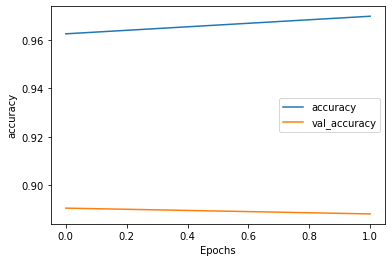

In [85]:
plot_graphs(history, 'accuracy')

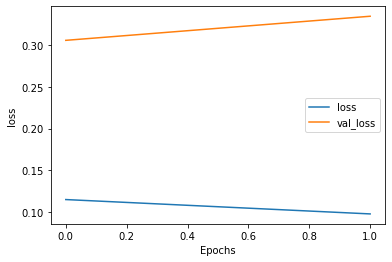

In [86]:
plot_graphs(history, 'loss')

- 데이터 제출

In [95]:
# 테스트 데이터 불러오기
DATA_OUT_PATH = './output/word2vec-nlp-tutorial/'
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'

test_input = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])

# 베스트 모델 불러오기
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

# 테스트 데이터 예측하기
predictions = model.predict(test_input, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'), allow_pickle=True)

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame(data={"id": list(test_id), "sentiment": list(predictions)} )
output.to_csv(DATA_OUT_PATH + 'movie_review_result_cnn.csv', index=False, quoting=3)

- 성능 결과 정리

모델|캐글 점수
---|---
로지스틱 회귀 모델|0.87400
랜덤 포레스트|0.84544
순환 신경망(RNN)|0.93818
컨볼루션 신경망(CNN)|0.93610

## 02. 한글 텍스트 분류

- KoNLPy: 한글 텍스트 분류에 사용하는 라이브러리

### 1) 문제 소개
- 네이버 영화 리뷰 데이터 "Naver sentiment movie corpus v1.0"
  - 네이버 영화 사용자 리뷰를 영화당 100개씩 모아서 만든 데이터
  - 감정의 경우 긍정 혹은 부정 값을 가짐
  

- 데이터 전처리 및 분석
  - [데이터 다운로드](https://github.com/e9t/nsmc)
    - ratings.txt: 전체 리뷰(20만 개 데이터)
    - ratings_train.txt: 학습 데이터(15만 개 데이터)
    - ratings_test.txt: 평가 데이터(5만 개 데이터)
    

### 2) 데이터 불러오기 및 탐색

In [96]:
DATA_IN_PATH = './data/naver-movie-review/'

print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


In [97]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [98]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 150000


- 각 데이터의 리뷰 길이 확인
  - apply 함수로 길이 값 추출

In [99]:
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

- 변수를 사용하여 전체 데이터의 길이에 대한 히스토그램 그리기

Text(0, 0.5, 'Number of review')

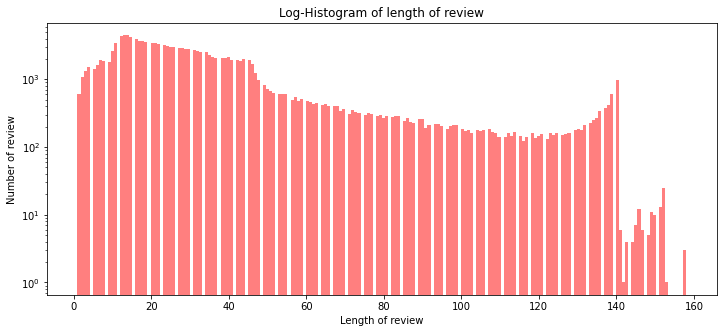

In [100]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

- 확인
  - 140자 제한(한글 기준) 데이터이기 때문에 최대 글자수에 데이터가 모인 형태

In [101]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1b956afbf40>,
 'caps': [<matplotlib.lines.Line2D at 0x1b956b2d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b956afbbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b956b2dd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b956b3d370>],
 'means': [<matplotlib.lines.Line2D at 0x1b956b3d040>]}

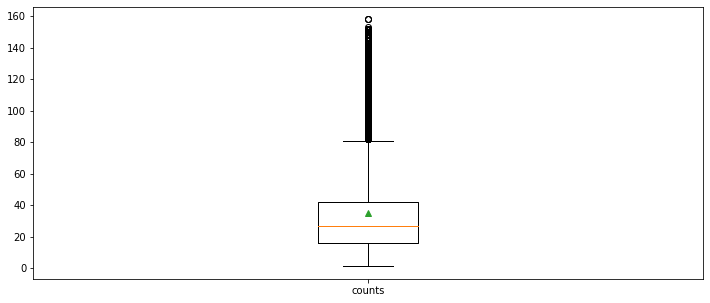

In [102]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

- 어휘 빈도 분석
  - 워드클라우드 사용
  - 오류 방지를 위해, 문자열이 아닌 데이터는 모두 제거

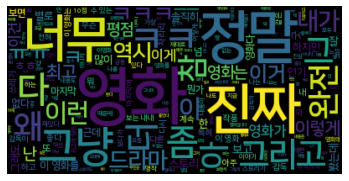

In [103]:
train_review = [review for review in train_data['document'] if type(review) is str]
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'NanumSquare.ttf').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- 긍정, 부정을 나타내는 라벨값 비율 확인

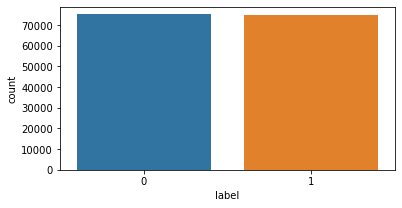

In [104]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

In [105]:
print("긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


- 단어 개수 히스토그램

Text(0, 0.5, 'Number of reviews')

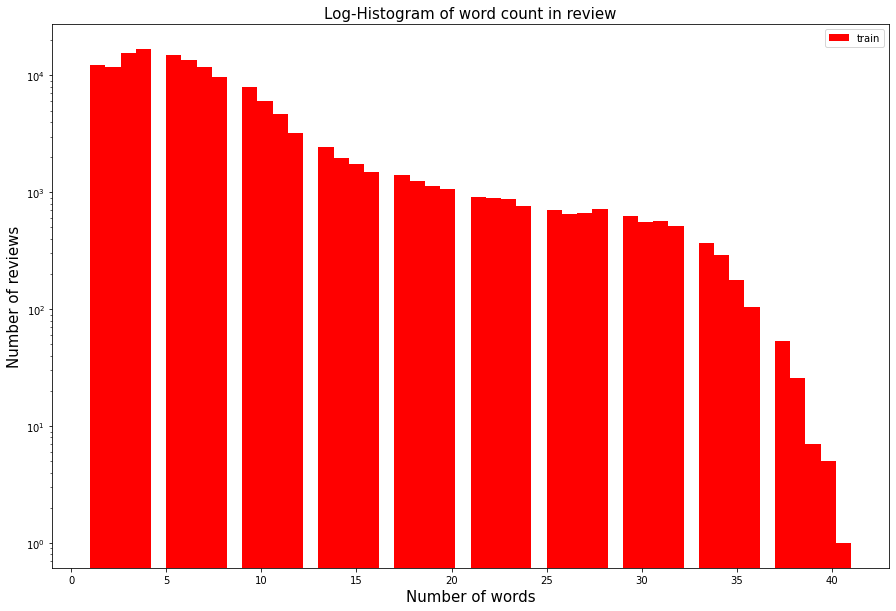

In [106]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [107]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 41
리뷰 단어 개수 최솟값: 1
리뷰 단어 개수 평균값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간값: 6.0
리뷰 단어 개수 제1사분위: 3.0
리뷰 단어 개수 제3사분위: 9.0


- 특수문자 유무 확인

In [108]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가 있는 질문: 8.25%
마침표가 있는 질문: 51.76%


#### 3) 데이터 전처리

In [109]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [110]:
# 판다스의 데이터프레임 형태로 불러오기
DATA_IN_PATH ='./data/naver-movie-review/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3 )

print(train_data.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


In [111]:
# 정규표현식을 이용해 한글 문자 제외 후 모두 제거
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", train_data['document'][0]) 
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [112]:
# 한글 불용어 제거
# 형태소 분석기를 사용할 때, 어간 추출을 적용해 어간이 추출된 단어로 나누기
okt=Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [113]:
# 한글 불용어 사전 만들기
# 한글 불용어는 따로 정해져 있지 않음
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['더빙', '진짜', '짜증나다', '목소리']


- 모든 데이터 전처리하기

In [114]:
# 전처리 과정을 하나의 함수로 만들기

def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # review: 전처리할 텍스트
    # okt: okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword: 불용어를 제거할지 선택 기본값은 False
    # stop_word: 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눔
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
    return word_review

- 학습 데이터 전처리 진행
  - okt 객체 생성, 불용어 사전 정의, 함수 실행

In [115]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data ['document']:
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])

clean_train_review[:4]

KeyboardInterrupt: 

- 평가 데이터에도 적용

In [118]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter='\t', quoting=3 )

clean_test_review = []

for review in test_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

KeyboardInterrupt: 

- 학습 / 평가 데이터를 인덱스 벡터로 바꾸고 패딩 처ㅣ하기
  - 텐서플로의 전처리 모듈 사용
    - 토크나이징 객체 생성 → 학습 데이터에만 적용 → 해당 객체로 두 데이터를 인덱스 벡터로 만듦 → 해당 데이터를 패딩 처리

In [119]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태
word_vocab["<PAD>"] = 0

In [120]:
MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 벡터화
train_labels = np.array(train_data['label']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 테스트 데이터를 벡터화
test_labels = np.array(test_data['label']) # 테스트 데이터의 라벨

- 만든 데이터를 모델링 과정에서 사용할 수 있도록 저장

In [121]:
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

### 4) 모델링
- 실습할 모델: CNN(합성곱 신경망)

In [122]:
# 학습 데이터 경로 정의
DATA_IN_PATH = './data/naver-movie-review/'
DATA_OUT_PATH = './output/naver-movie-review/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

# 랜덤 시드 고정
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

# 파일 로드
train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA, 'rb'))
train_label = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

# 모델 하이퍼파라미터 정의
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

- 모델 함수

In [123]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

- 모델 학습

In [124]:
model = CNNClassifier(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [125]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

./output/naver-movie-review/cnn_classifier_kr -- Folder create complete 



In [126]:
# 4분 가량 소요
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/10
195/195 [==============================] - ETA: 0s - loss: 0.4753 - accuracy: 0.7645
Epoch 00001: val_accuracy improved from -inf to 0.81349, saving model to ./output/naver-movie-review/cnn_classifier_kr\weights.h5
195/195 [==============================] - 33s 170ms/step - loss: 0.4753 - accuracy: 0.7645 - val_loss: 0.4052 - val_accuracy: 0.8135
Epoch 2/10
195/195 [==============================] - ETA: 0s - loss: 0.3593 - accuracy: 0.8415
Epoch 00002: val_accuracy improved from 0.81349 to 0.81557, saving model to ./output/naver-movie-review/cnn_classifier_kr\weights.h5
195/195 [==============================] - 32s 163ms/step - loss: 0.3593 - accuracy: 0.8415 - val_loss: 0.3903 - val_accuracy: 0.8156
Epoch 3/10
195/195 [==============================] - ETA: 0s - loss: 0.3033 - accuracy: 0.8714
Epoch 00003: val_accuracy improved from 0.81557 to 0.81602, saving model to ./output/naver-movie-review/cnn_classifier_kr\weights.h5
195/195 [==============================] - 35s 1

- 성능 그래프 그리기

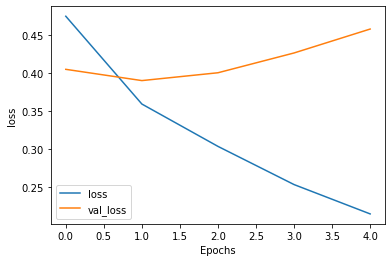

In [127]:
plot_graphs(history, 'loss')

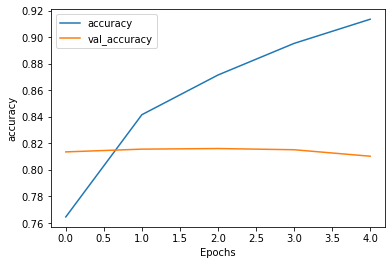

In [128]:
plot_graphs(history, 'accuracy')

- 결과 평가

In [129]:
DATA_OUT_PATH = './output/naver-movie-review/'
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5' #저장된 best model 이름

test_input = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

In [130]:
model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))
model.evaluate(test_input, test_label_data)

ValueError: Data cardinality is ambiguous:
  x sizes: 775
  y sizes: 50000
Please provide data which shares the same first dimension.